<a href="https://colab.research.google.com/github/vishalsahuu/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Email Campaign Effectiveness Prediction**

##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

##**Business Context**
Email marketing is the act of sending a commercial message, typically to a group of people, using email. In its broadest sense, every email sent to a potential or current customer could be considered email marketing. It involves using email to send advertisements, request business, or solicit sales or donations. Email marketing strategies commonly seek to achieve one or more of three primary objectives, to build loyalty, trust, or brand awareness. The term usually refers to sending email messages with the purpose of enhancing a merchant's relationship with current or previous customers, encouraging customer loyalty and repeat business, acquiring new customers or convincing current customers to purchase something immediately, and sharing third-party ads.

## **Data Description**
* **Email Id** - It contains the email id's of the customers/individuals
* **Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.
* **Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.
* **Email Campaign Type** - The campaign type of the email.
* **Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.
* **Customer Location** - Contains demographical data of the customer, the location where the customer resides.
* **Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
* **Word Count** - The number of words contained in the email.
* **Total links** - Number of links in the email.
* **Total Images** - Number of images in the email.
* **Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

## **Importing**

In [161]:
# Importing important libraries and modules
# For data reading and manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelling
# Train-Test Split
from sklearn.model_selection import train_test_split
# Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [162]:
# Reading the csv dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Supervised ML - Classification/data_email_campaign.csv')

### **Data Inspection**

In [163]:
# Size of the data
df.shape

(68353, 12)

In [164]:
# First look of our dataset
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [165]:
# Basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


## Data Preprocessing

In [166]:
df.isnull().mean()*100

Email_ID                      0.000000
Email_Type                    0.000000
Subject_Hotness_Score         0.000000
Email_Source_Type             0.000000
Customer_Location            16.963411
Email_Campaign_Type           0.000000
Total_Past_Communications     9.984931
Time_Email_sent_Category      0.000000
Word_Count                    0.000000
Total_Links                   3.220049
Total_Images                  2.453440
Email_Status                  0.000000
dtype: float64

In [167]:
# Description of the data
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [168]:
# Looking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset.

## **Exploratory Data Analysis**

## Univariate Analysis

## **Handling Missing Data**

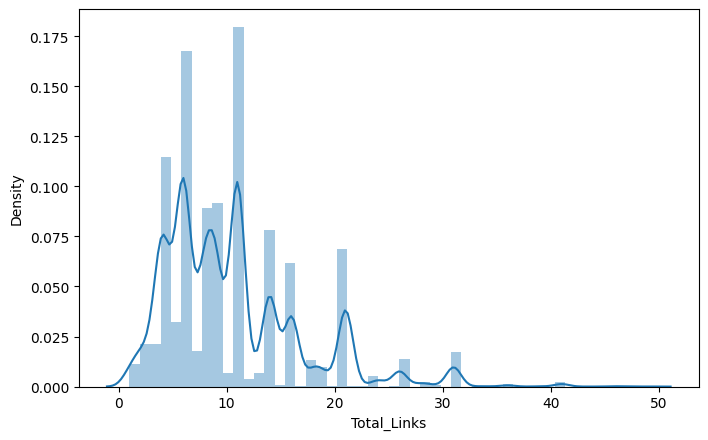

In [169]:
sns.distplot(df['Total_Links'])

In [170]:
new_df = df

In [171]:
new_df['Total_Links'].fillna(new_df['Total_Links'].mode()[0],inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

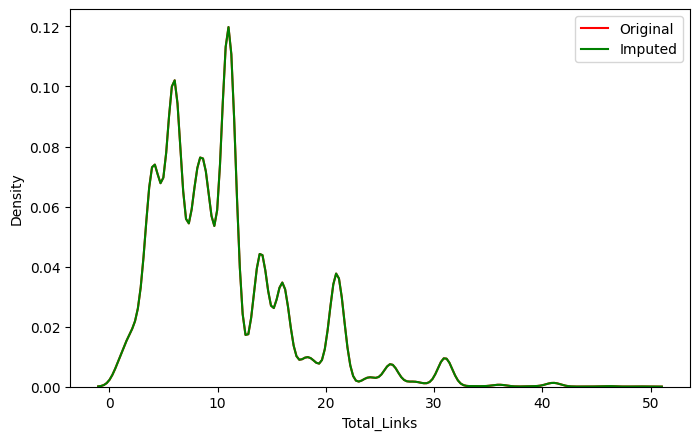

In [172]:
sns.kdeplot(df['Total_Links'],label='Original',color='red')
sns.kdeplot(new_df['Total_Links'],label='Imputed',color='green')
plt.legend()
plt.show

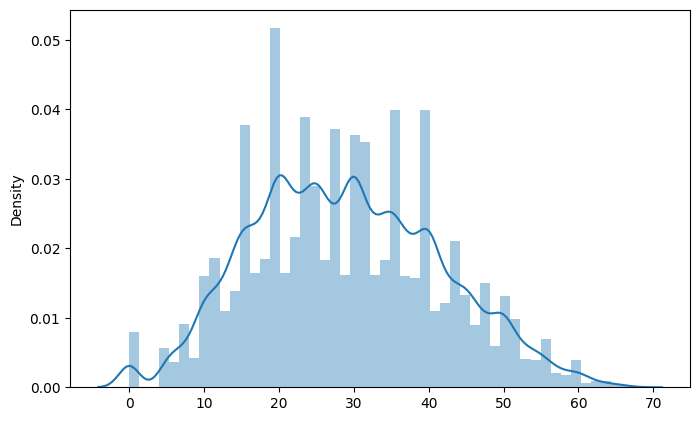

In [173]:
sns.distplot(x=df['Total_Past_Communications'], hist = True)

In [174]:
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(),inplace=True)

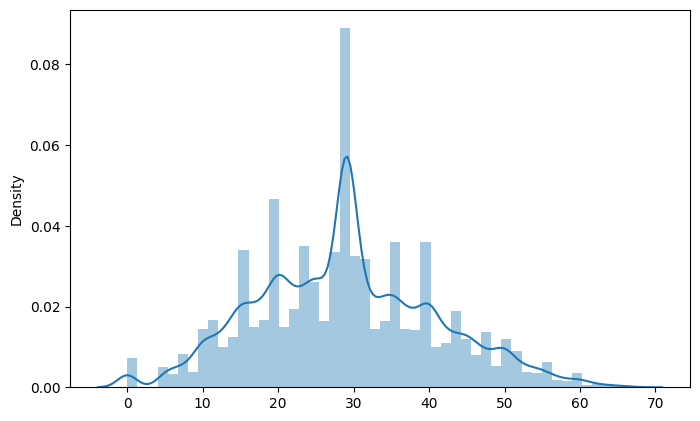

In [175]:
sns.distplot(x=df['Total_Past_Communications'], hist = True)

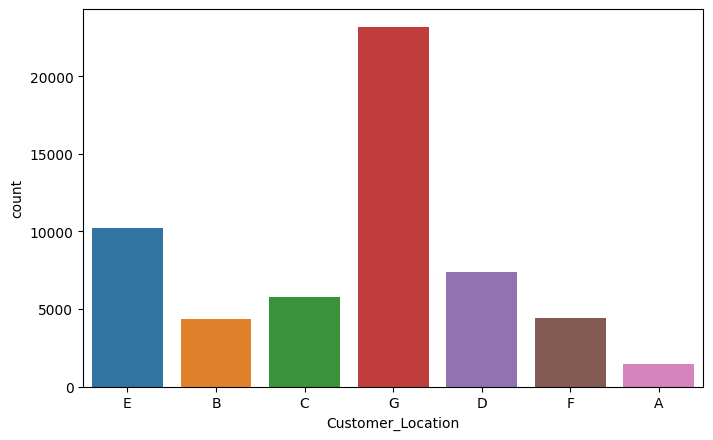

In [176]:
sns.countplot(x=df['Customer_Location'])

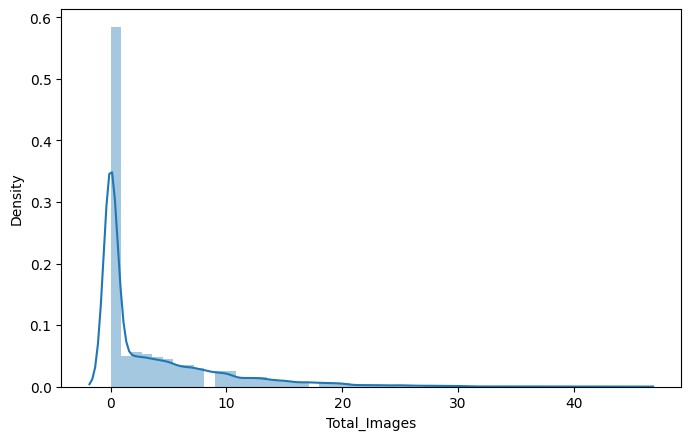

In [177]:
sns.distplot(df['Total_Images'])

In [178]:
new_df['Total_Images'].fillna(new_df['Total_Images'].mode()[0],inplace=True)

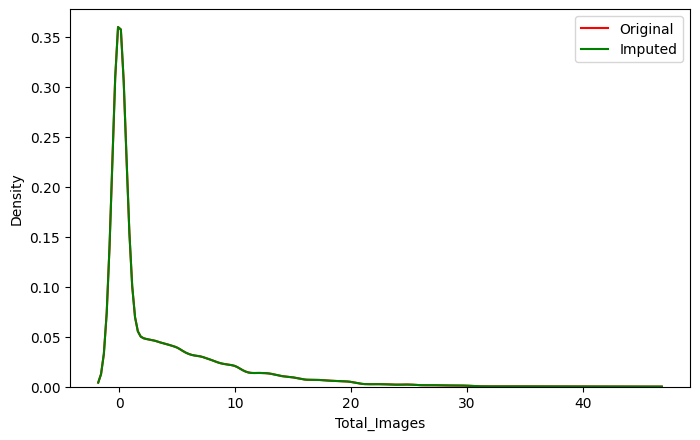

In [179]:
sns.kdeplot(df['Total_Images'],label='Original',color='red')
sns.kdeplot(new_df['Total_Images'],label='Imputed',color='green')
plt.legend()
plt.show()

In [180]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

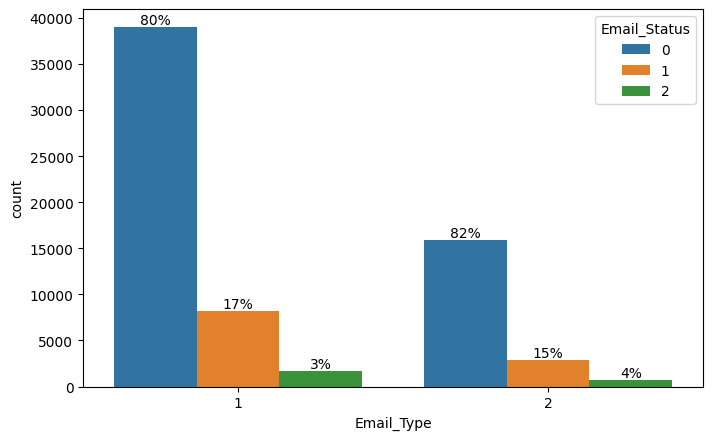

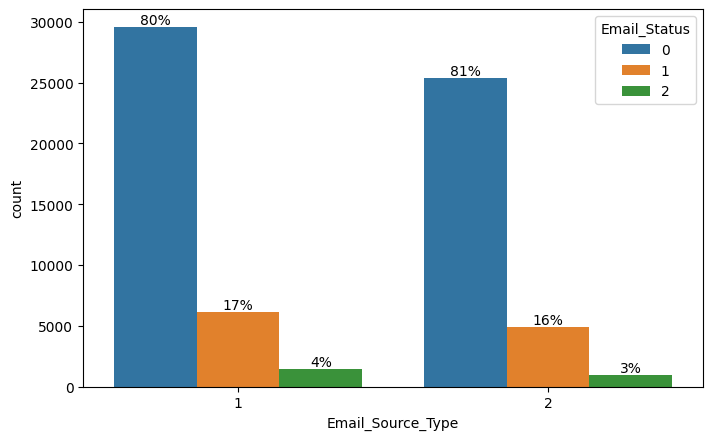

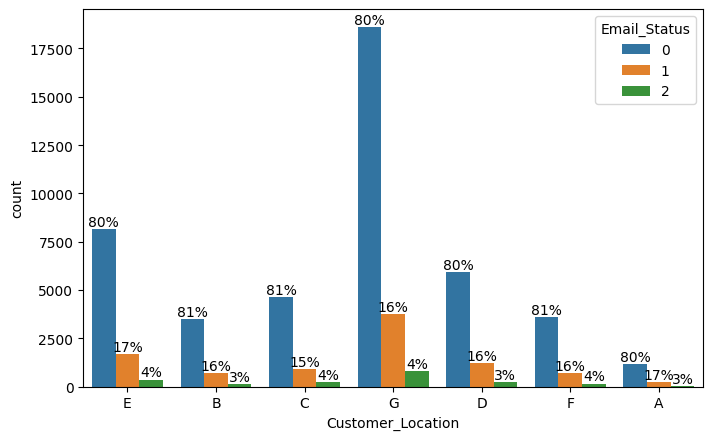

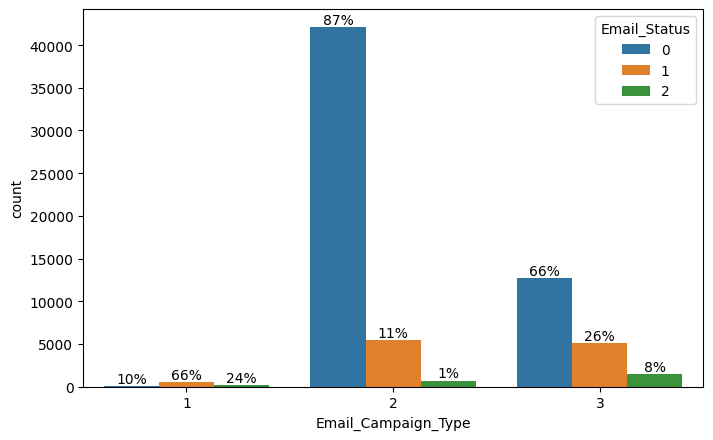

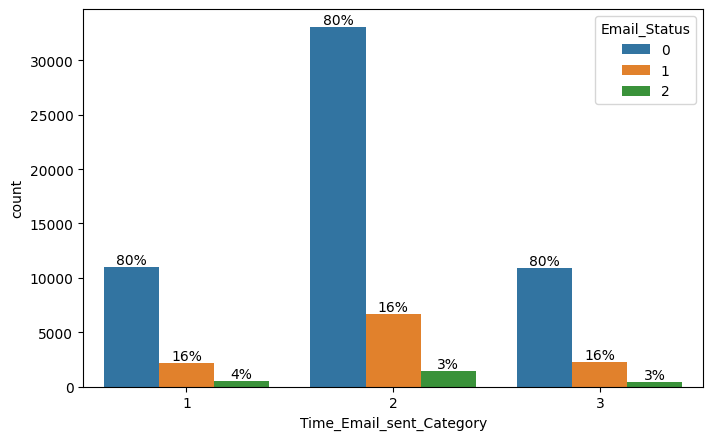

In [181]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_variable = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_variable[0]])
  unique = len([x for x in df[value].unique() if x==x])
  # Bars are created in hue order
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      # Print percentage on the bars
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()

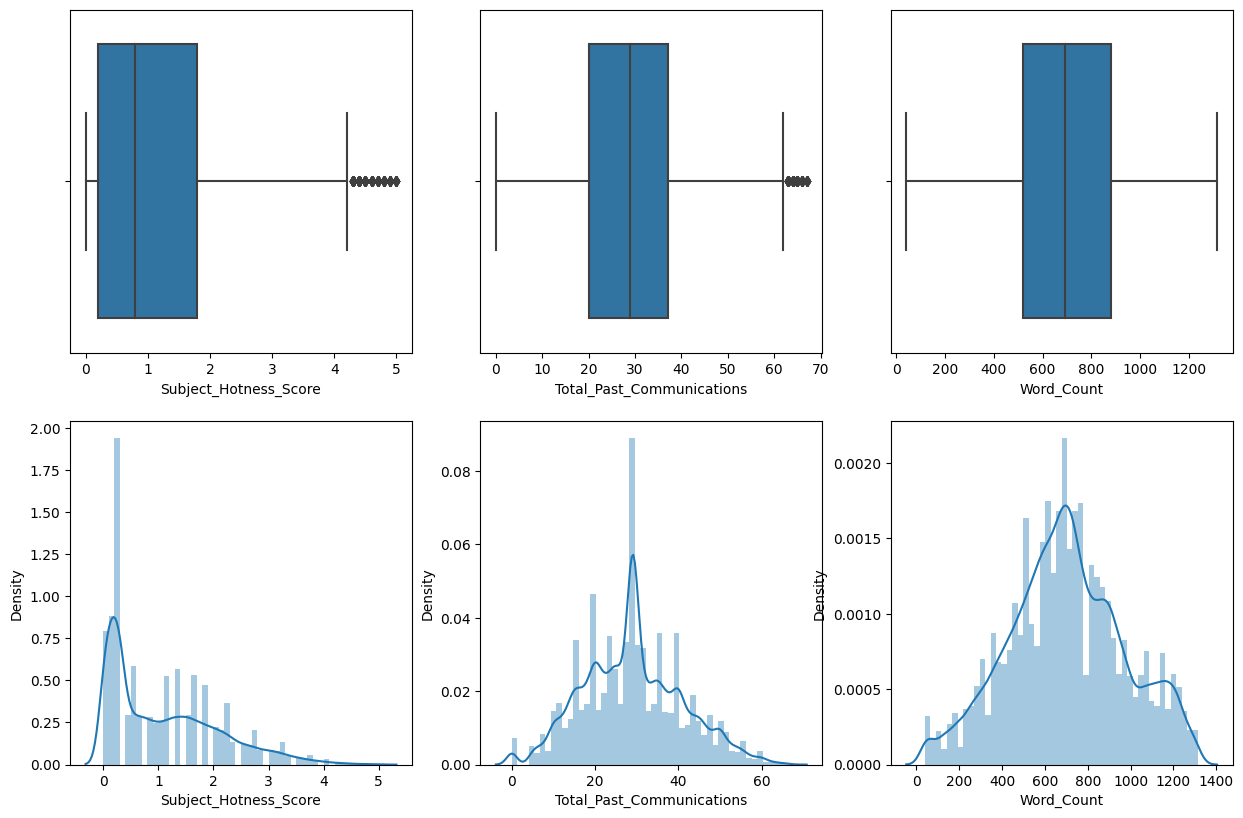

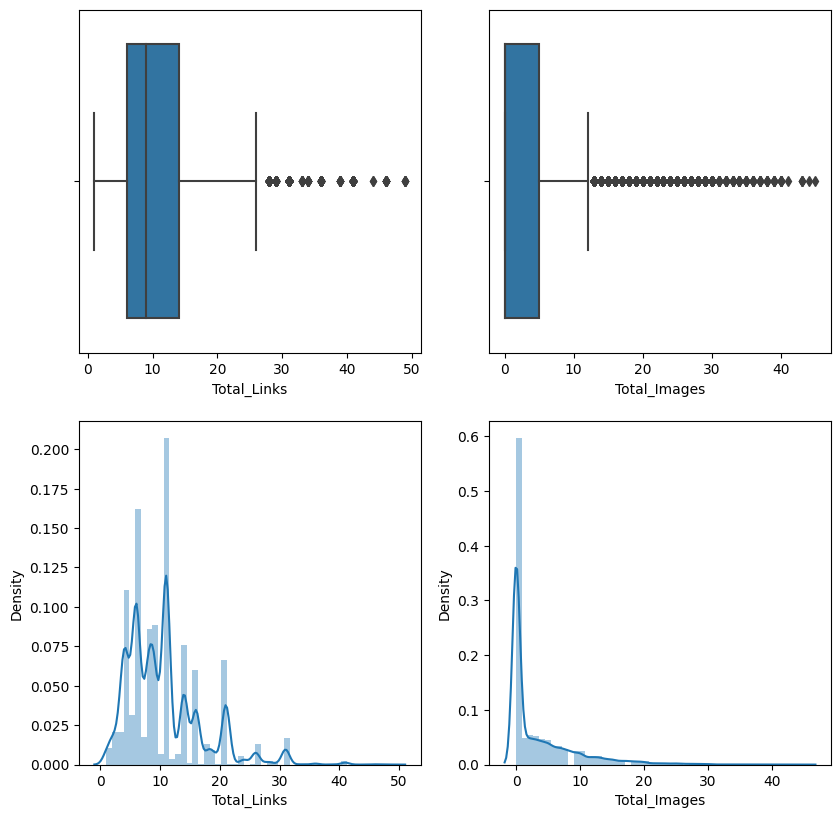

In [182]:
#continuous variables
continuous_variables = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
i = 1
fig = plt.figure(figsize = (15,10))
for c in list(continuous_variables):
    if i <= 3:
            ax1 = fig.add_subplot(2,3,i)
            sns.boxplot(data = df, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,i+3)
            sns.distplot(df[c], ax=ax2)
            
    i += 1
    if i == 4: 
        fig = plt.figure(figsize = (15,10))
        i = 1

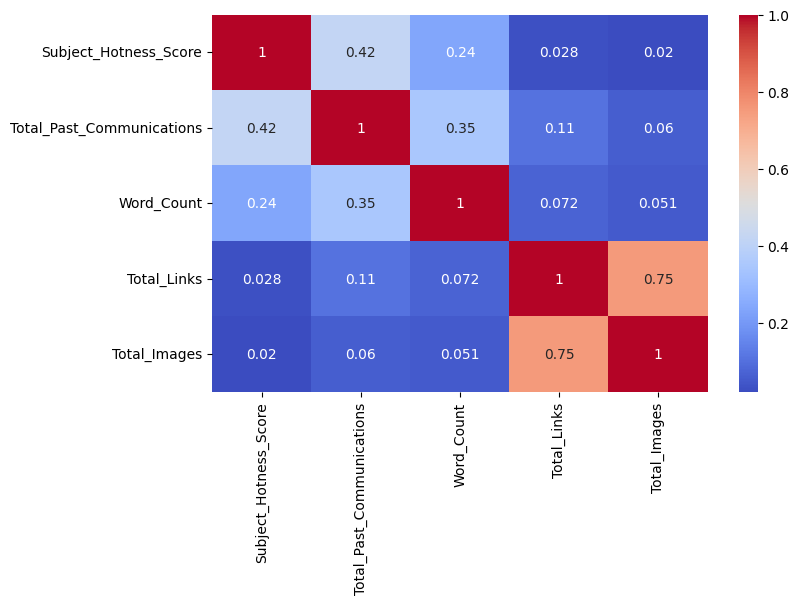

In [183]:
## Correlation between continuous variables 
correlation = df[continuous_variables].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **Feature Engineering**

In [184]:
# VIF code
def vif_cal(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [185]:
# Let's get VIF scores
vif_df = vif_cal(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


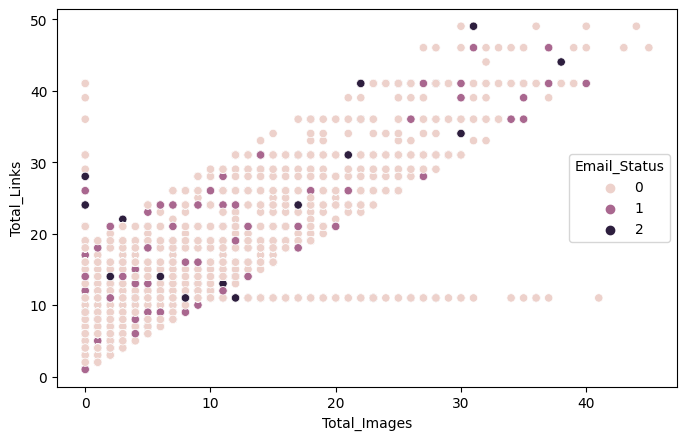

In [186]:
#scatter plot between total images and total links
sns.scatterplot(x=df["Total_Images"],y=df["Total_Links"],hue=df['Email_Status'])

The ralation between Total Links and Total Images is almost linear so it would be better to add them together.

In [187]:
# Combining total links and total images
df['Total_Images_links'] = df['Total_Images'] + df['Total_Links']
# Dropping previous columns
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [188]:
# Let's check VIF scores
vif_df = vif_cal(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Images_links,2.629047


## Outliers Treatment

In [190]:
# Removing dropped columns from the dataset
continuous_variables.remove('Total_Images')
continuous_variables.remove('Total_Links')
# Adding the combined column
continuous_variables.append('Total_Images_links')

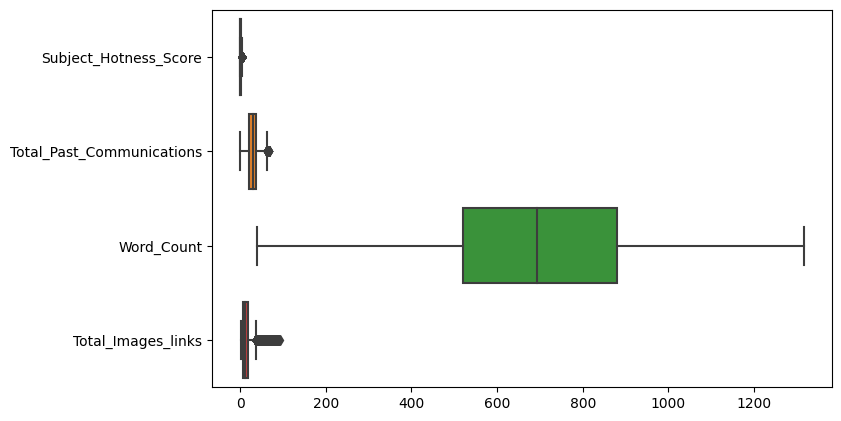

In [196]:
# Check for the outliers in continuous variables
sns.boxplot(data=df[continuous_variables],orient='h',dodge=False)